In [30]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn

from sklearn.decomposition import PCA
from bpca import BPCA
from ppca import PPCA

from vis_utils import hinton

In [31]:
cov = np.diag(np.array([5,4,3,2,1,1,1,1,1,1])**2)
data = np.random.multivariate_normal(np.zeros(10), cov, size=100)
print(data.shape)

(100, 10)


In [32]:
bpca = BPCA()
bpca.fit(data, verbose=True, trace_elbo=True, trace_variation=True, print_every=9999999)
ppca = PPCA(n_dimension=10)
ppca.fit(data, method='EM')
pca = PCA(n_components=10)
pca.fit(data)

Iter 0, ELBO: -14404.665860, alpha: [14.32009246  3.95304323  3.38292597 13.26247957 12.31118581  5.88624252
  7.91968196  8.64034759 24.43726973]


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# weight matrices

In [47]:
def hinton_all(bpca, ppca, pca):
    hinton(bpca.get_weight_matrix().T)
    hinton(ppca._return_W().T)
    hinton(pca.components_)

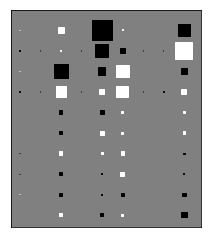

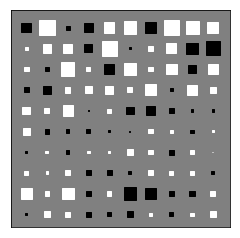

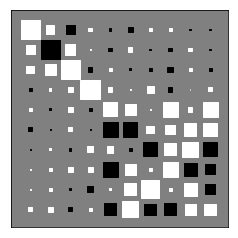

In [48]:
hinton_all(bpca, ppca, pca)

# BPCA weight distribution vs. PCA variance ratio

In [ ]:
def plot_BPCA_weight_PCA_var(bpca, pca):
    plt.plot(sorted(np.sum(np.abs((bpca.get_weights())), axis=1), reverse=True), label='BPCA weight distribution')
    plt.plot(pca.explained_variance_ratio_*(np.sum(np.abs(bpca.get_weights()))/np.sum(pca.explained_variance_ratio_)), label='PCA variance ratio (rescaled)')
    plt.legend()
    plt.xlabel('number of dimentions (0 indexed)')
    plt.ylabel('arb range')
    plt.title('BPCA weight distribution vs. PCA explained variance ratio')
    plt.show()

In [ ]:
plot_BPCA_weight_PCA_var(bpca, pca)

# number of captured dimension

In [ ]:
def captured_dimensions(bpca):
    min_percent = 0.02
    total_weight = np.sum(np.abs(bpca.get_weights()))
    return np.sum([1 for col in np.sum(np.abs((bpca.get_weights())), axis=1).tolist() if col > min_percent*total_weight]) 

In [ ]:
captured_dimensions(bpca)

In [ ]:
#conditions -- 
# different distributions (not just normal)
# different number of dimensions                                    [x]
# different number of datapoints

#plots --
#weight distribution against explained variance ratio               [x]
#hinton plots                                                       [x]
#number of actual dimentions vs number of captured dimensions

#MNIST dataset

# Different number of dimensions

In [ ]:
n_dim_plot = []
n_dim_plot_captured = []
for n_dim in np.arange(1, 11):
    max_dim = 10
    num_points = 100
    print('============= NUMBER OF DIMENSIONS: {} ============='.format(n_dim))
    seed_arr = [i+2 for i in range(n_dim)][::-1]
    #print(seed_arr)
    while len(seed_arr) < max_dim:
        seed_arr.extend([1])
    #print(seed_arr)
    
    cov = np.diag(np.array(seed_arr)**2)
    data = np.random.multivariate_normal(np.zeros(max_dim), cov, size=num_points)
    
    bpca = BPCA(data.T)
    bpca.fit(print_every=999999999)
    pca = PCA(n_components=max_dim)
    pca.fit(data)
    
    hinton_BPCA_PCA(bpca, pca)
    plot_BPCA_weight_PCA_var(bpca, pca)
    
    n_dim_plot.append(n_dim)
    n_dim_plot_captured.append(captured_dimensions(bpca))
    
    print('============= NUMBER OF DIMENSIONS: {} ============='.format(n_dim))
plt.plot(n_dim_plot, n_dim_plot_captured, 'o-')
plt.xlabel('number of dimensions (true)')
plt.ylabel('number of dimensions (captured by BPCA)')
plt.title('bpca captured dimensions vs number of true dimensions')
plt.show()

* pca performs better when you need to use < ideal number of components? (it could inform range to scan for PCA?)
* bpca fails when you don't have a sufficient number of data points to infer?

# Different number of data points

In [ ]:
n_points_plot = []
n_dim_plot_captured = []
n_dim = 25
max_dim = n_dim

for num_points in np.arange(100, 1001, 50):
    print('============= NUMBER OF POINTS: {} ============='.format(num_points))
    seed_arr = [i+2 for i in range(n_dim)][::-1]
    #print(seed_arr)
    while len(seed_arr) < max_dim:
        seed_arr.extend([1])
    #print(seed_arr)
    
    cov = np.diag(np.array(seed_arr)**2)
    data = np.random.multivariate_normal(np.zeros(max_dim), cov, size=num_points)
    
    bpca = BPCA(data.T)
    bpca.fit(print_every=999999999)
    pca = PCA(n_components=max_dim)
    pca.fit(data)
    
    hinton_BPCA_PCA(bpca, pca)
    plot_BPCA_weight_PCA_var(bpca, pca)
    
    n_points_plot.append(num_points)
    n_dim_plot_captured.append(captured_dimensions(bpca))
    
    print('============= NUMBER OF POINTS: {} ============='.format(num_points))
plt.plot(n_points_plot, n_dim_plot_captured, 'o-')
plt.xlabel('number of dimensions (true)')
plt.ylabel('number of dimensions (captured by BPCA)')
plt.title('bpca captured dimensions vs number of true dimensions')
plt.show()

* some relationship between num points/distribution/etc. with required number of data points
* number of dimensions captured (true number is 25) gets closer to truth as num data points increases (make a scan to determine so approximate relationship?)

In [ ]:
a = np.array((1,2,3))
b = np.array((2,3,4))
print(a.shape)
c = np.column_stack((a,b))
print(c)
d = np.column_stack((c, a))
d.shape

# different number of dimensions for poisson distribution

In [ ]:
n_dim_plot = []
n_dim_plot_captured = []
for n_dim in np.arange(1, 11):
    max_dim = 10
    num_points = 100
    print('============= NUMBER OF DIMENSIONS: {} ============='.format(n_dim))
    seed_arr = [i+2 for i in range(n_dim)][::-1]
    #print(seed_arr)
    while len(seed_arr) < max_dim:
        seed_arr.extend([1])
    #print(seed_arr)
    
    cov = np.diag(np.array(seed_arr)**2)
    data = None
    for seed in seed_arr:
        data_col = np.random.poisson(lam=seed, size=num_points)
        if data is None:
            data = data_col
        else:
            data = np.column_stack((data, data_col))
    
    bpca = BPCA(data.T)
    bpca.fit(print_every=999999999)
    pca = PCA(n_components=max_dim)
    pca.fit(data)
    
    hinton_BPCA_PCA(bpca, pca)
    plot_BPCA_weight_PCA_var(bpca, pca)
    
    n_dim_plot.append(n_dim)
    n_dim_plot_captured.append(captured_dimensions(bpca))
    
    print('============= NUMBER OF DIMENSIONS: {} ============='.format(n_dim))
plt.plot(n_dim_plot, n_dim_plot_captured, 'o-')
plt.xlabel('number of dimensions (true)')
plt.ylabel('number of dimensions (captured by BPCA)')
plt.title('bpca captured dimensions vs number of true dimensions')
plt.show()

# Different number of data points for poisson distribution

In [ ]:
n_points_plot = []
n_dim_plot_captured = []
n_dim = 25
max_dim = n_dim

for num_points in np.arange(100, 1001, 50):
    print('============= NUMBER OF POINTS: {} ============='.format(num_points))
    seed_arr = [i+2 for i in range(n_dim)][::-1]
    #print(seed_arr)
    while len(seed_arr) < max_dim:
        seed_arr.extend([1])
    #print(seed_arr)
    
    #cov = np.diag(np.array(seed_arr)**2)
    #data = np.random.multivariate_normal(np.zeros(max_dim), cov, size=num_points)
    cov = np.diag(np.array(seed_arr)**2)
    data = None
    for seed in seed_arr:
        data_col = np.random.poisson(lam=seed, size=num_points)
        if data is None:
            data = data_col
        else:
            data = np.column_stack((data, data_col))
    
    bpca = BPCA(data.T)
    bpca.fit(print_every=999999999)
    pca = PCA(n_components=max_dim)
    pca.fit(data)
    
    hinton_BPCA_PCA(bpca, pca)
    plot_BPCA_weight_PCA_var(bpca, pca)
    
    n_points_plot.append(num_points)
    n_dim_plot_captured.append(captured_dimensions(bpca))
    
    print('============= NUMBER OF POINTS: {} ============='.format(num_points))
plt.plot(n_points_plot, n_dim_plot_captured, 'o-')
plt.xlabel('number of dimensions (true)')
plt.ylabel('number of dimensions (captured by BPCA)')
plt.title('bpca captured dimensions vs number of true dimensions')
plt.show()

* worse with non normal distribs??

mixtures?
titanic/wtv. dataset (we need to apply it to something i think?)